In [9]:
#import libraries

import csv
import pandas as pd
import numpy as np

In [10]:

# needed imports# neede 
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage


In [11]:
# some setting for this notebook to actually show the graphs inline
# you probably won't need this
%matplotlib inline
np.set_printoptions(precision=5, suppress=True)  # suppress scientific float notation

In [83]:
reducedX = pd.read_csv('datalabel1.csv', index_col = [0])
reducedX = reducedX.loc[:, (reducedX != 0).any(axis=0)]
#reducedX = reducedX.iloc[:,1:]

In [91]:
mamlist = ['./20131209_P96solsRun/monopeaklists/20131209_P96solsRun_N7.csv', './20131218_PH92solRun/monopeaklists/20131218_PH92solRun_G17.csv', './20140116_PH60SOLrun/monopeaklists/20140116_PH60SOLrun_C21.csv', './20131112_P140sols/monopeaklists/20131112_P140sols_H10.csv', './20131112_P140sols/monopeaklists/20131112_P140sols_I24.csv', './20131112_P140sols/monopeaklists/20131112_P140sols_L9.csv']

for i in mamlist:
    reducedX.replace(i, 1)

if reducedX['filename'] == 1:
    print("f")
    
print(reducedX)

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [80]:
X = pd.read_csv('data.csv', index_col = [0])

labels = reducedX.iloc[:,0]
str1 = labels.tolist()
X = X.loc[:, (X != 0).any(axis=0)]

#
X.head()

reducedX.set_index('filename')
print(reducedX)

                                               filename  (699, 700)  \
0     ./20131112_P136sols/monopeaklists/20131112_P13...           0   
1     ./20131112_P136sols/monopeaklists/20131112_P13...           0   
2     ./20131112_P136sols/monopeaklists/20131112_P13...           0   
3     ./20131112_P136sols/monopeaklists/20131112_P13...           0   
4     ./20131112_P136sols/monopeaklists/20131112_P13...           0   
5     ./20131112_P136sols/monopeaklists/20131112_P13...           0   
6     ./20131112_P136sols/monopeaklists/20131112_P13...           0   
7     ./20131112_P136sols/monopeaklists/20131112_P13...           0   
8     ./20131112_P136sols/monopeaklists/20131112_P13...           0   
9     ./20131112_P136sols/monopeaklists/20131112_P13...           0   
10    ./20131112_P136sols/monopeaklists/20131112_P13...           0   
11    ./20131112_P136sols/monopeaklists/20131112_P13...           0   
12    ./20131112_P136sols/monopeaklists/20131112_P13...           0   
13    

In [92]:
mamlist = ['./20131209_P96solsRun/monopeaklists/20131209_P96solsRun_N7.csv', './20131218_PH92solRun/monopeaklists/20131218_PH92solRun_G17.csv', './20140116_PH60SOLrun/monopeaklists/20140116_PH60SOLrun_C21.csv', './20131112_P140sols/monopeaklists/20131112_P140sols_H10.csv', './20131112_P140sols/monopeaklists/20131112_P140sols_I24.csv', './20131112_P140sols/monopeaklists/20131112_P140sols_L9.csv']
str2 = str1
        
mamlist = ['./20131209_P96solsRun/monopeaklists/20131209_P96solsRun_N7.csv', './20131218_PH92solRun/monopeaklists/20131218_PH92solRun_G17.csv', './20140116_PH60SOLrun/monopeaklists/20140116_PH60SOLrun_C21.csv', './20131112_P140sols/monopeaklists/20131112_P140sols_H10.csv', './20131112_P140sols/monopeaklists/20131112_P140sols_I24.csv', './20131112_P140sols/monopeaklists/20131112_P140sols_L9.csv']
for index, item in enumerate(str2):
    if not (item in mamlist):
        str2[index] = None

for index, item in enumerate(str2):
    if not (item == None):
        str2[index] = 1
        
#print(str2)
len(str2)

5242

In [77]:

# generate the linkage matrix
Z = linkage(reducedX, 'ward')

ValueError: could not convert string to float: './20140115_PH72SOLrun/monopeaklists/20140115_PH72SOLrun_E15.csv'

In [31]:
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

c, coph_dists = cophenet(Z, pdist(X))
c

0.25564767328839194

In [95]:
Z[100]
#len(Z)

array([2300.     , 2462.     ,    7.07107,    2.     ])

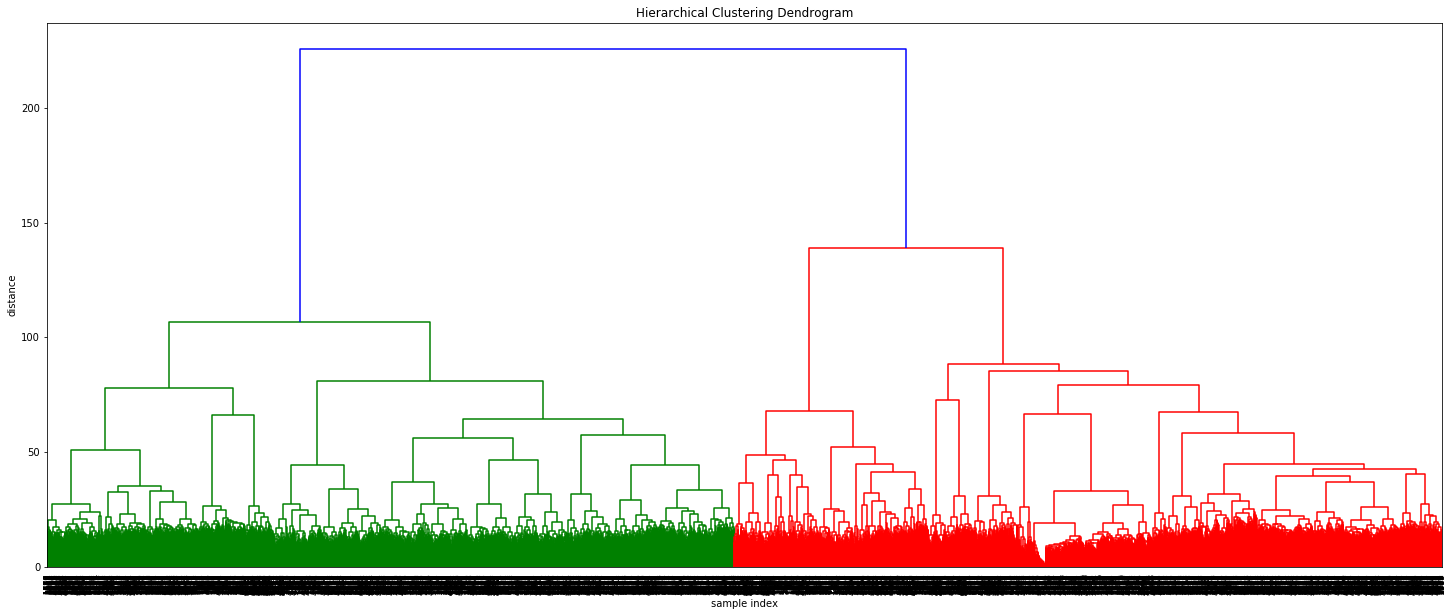

In [76]:
# calculate full dendrogram
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.1, # font size for the x axis labels
    
    
    
)
plt.show()

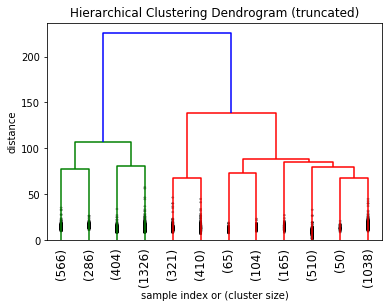

In [34]:
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('sample index or (cluster size)')
plt.ylabel('distance')
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=12,  # show only the last p merged clusters
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,  # to get a distribution impression in truncated branches
)
plt.show()

In [36]:
def fancy_dendrogram(*args, **kwargs):
    max_d = kwargs.pop('max_d', None)
    if max_d and 'color_threshold' not in kwargs:
        kwargs['color_threshold'] = max_d
    annotate_above = kwargs.pop('annotate_above', 0)

    ddata = dendrogram(*args, **kwargs)

    if not kwargs.get('no_plot', False):
        plt.title('Hierarchical Clustering Dendrogram (truncated)')
        plt.xlabel('sample index or (cluster size)')
        plt.ylabel('distance')
        for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            if y > annotate_above:
                plt.plot(x, y, 'o', c=c)
                plt.annotate("%.3g" % y, (x, y), xytext=(0, -5),
                             textcoords='offset points',
                             va='top', ha='center')
        if max_d:
            plt.axhline(y=max_d, c='k')
    return ddata

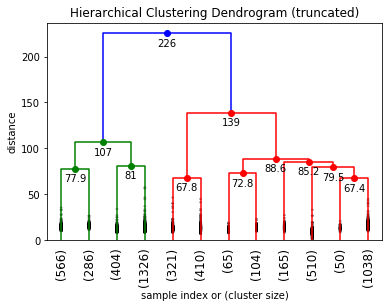

In [40]:

fancy_dendrogram(
    Z,
    truncate_mode='lastp',
    p=12,
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,
    annotate_above=10,  # useful in small plots so annotations don't overlap
)
plt.show()

In [50]:
# set cut-off to 50
max_d = 139  # max_d as in max_distance


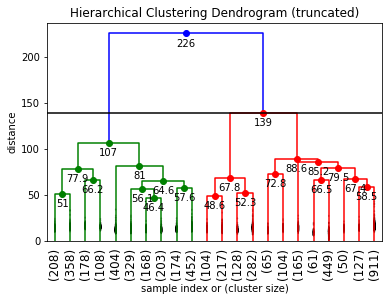

In [51]:
fancy_dendrogram(
    Z,
    truncate_mode='lastp',
    p=22,
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,
    annotate_above=10,
    max_d=max_d,  # plot a horizontal cut-off line
)
plt.show()


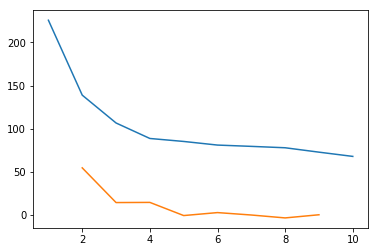

clusters: 2


In [43]:
last = Z[-10:, 2]
last_rev = last[::-1]
idxs = np.arange(1, len(last) + 1)
plt.plot(idxs, last_rev)

acceleration = np.diff(last, 2)  # 2nd derivative of the distances
acceleration_rev = acceleration[::-1]
plt.plot(idxs[:-2] + 1, acceleration_rev)
plt.show()
k = acceleration_rev.argmax() + 2  # if idx 0 is the max of this we want 2 clusters
print("clusters:", k)

In [44]:
from scipy.cluster.hierarchy import fcluster
max_d = 50
clusters = fcluster(Z, max_d, criterion='distance')
clusters

array([17,  5, 17, ...,  9,  5,  9], dtype=int32)